In [148]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

### State 정의

In [149]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

### research 에이전트 생성

In [150]:
import functools
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

from langchain_teddynote.tools.tavily import TavilySearch

tavily_tool = TavilySearch(max_results=1)

llm = ChatOpenAI(
    api_key=key, 
    model='gpt-4o', 
    temperature=0
)

# Research Agent 생성
research_agent = create_react_agent(llm, tools=[tavily_tool])

### Agent 생성하는 Utility

In [151]:
def agent_node(state, agent, name):
    
    print('=================================================================================')
    print(f"🔄 [Node] 에이전트 생성 노드 : {name}  🔄")

    print(f"[{name}] 에이전트 호출: ")

    agent_response = agent.invoke(state)                        

    print(agent_response)
    print()

    # print(f"agent의 마지막 메시지를 HumanMessage로 변환: ")
    # print(agent_response["messages"][-1].content)    
    
    print('=================================================================================')

    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

In [152]:
# research node 생성
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

In [153]:
result1 = research_node(
    {
        "messages": [
            HumanMessage(content="대구 교보문고")
        ]
    }
)

🔄 [Node] 에이전트 생성 노드 : Researcher  🔄
[Researcher] 에이전트 호출: 
{'messages': [HumanMessage(content='대구 교보문고', additional_kwargs={}, response_metadata={}, id='fed1213b-cde1-40ec-b30a-3ef46c11dc7a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LahXrEIsMrodP5fmuDjn0JN5', 'function': {'arguments': '{"query":"대구 교보문고 위치"}', 'name': 'tavily_web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 97, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6dd05565ef', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-20d8ee80-5869-42f7-a5c6-5046dbbad601-0', tool_calls=[{'name': 'tavily_web_search', 'args': {'query': '대구 교보문고 위치'}, 'id': 'call_LahXrEIsMrodP5fmuDjn0

### coder 에이전트 생성

In [154]:
import functools
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

from langchain_experimental.tools import PythonREPLTool

python_repl_tool = PythonREPLTool()

llm = ChatOpenAI(
    api_key=key, 
    model='gpt-4o', 
    temperature=0
)

code_system_prompt = """
Be sure to use the following font in your code for visualization.

##### 폰트 설정 #####
import platform

# OS 판단
current_os = platform.system()

if current_os == "Windows":
    # Windows 환경 폰트 설정
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
    fontprop = fm.FontProperties(fname=font_path, size=12)
    plt.rc("font", family=fontprop.get_name())
elif current_os == "Darwin":  # macOS
    # Mac 환경 폰트 설정
    plt.rcParams["font.family"] = "AppleGothic"
else:  # Linux 등 기타 OS
    # 기본 한글 폰트 설정 시도
    try:
        plt.rcParams["font.family"] = "NanumGothic"
    except:
        print("한글 폰트를 찾을 수 없습니다. 시스템 기본 폰트를 사용합니다.")

##### 마이너스 폰트 깨짐 방지 #####
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 폰트 깨짐 방지
"""


llm = ChatOpenAI(
    api_key=key, 
    model='gpt-4o', 
    temperature=0
)


# Coder Agent 생성
coder_agent = create_react_agent(
    llm,
    tools=[python_repl_tool],
    state_modifier=code_system_prompt,
)

coder_node = functools.partial(agent_node, agent=coder_agent, name="Coder")

🔄 [Node] 에이전트 생성 노드 : Coder  🔄
[Coder] 에이전트 호출: 


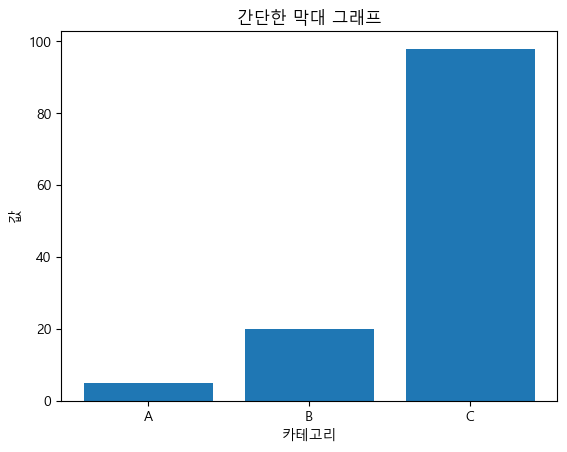

{'messages': [HumanMessage(content="파이썬으로 간단한 막대 그래프를 그려주세요. x축은 ['A', 'B', 'C'], y축은 [5, 20, 98]입니다.", additional_kwargs={}, response_metadata={}, id='b7af0ad1-360c-4091-8a56-9ff9070acc1e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3AWYGCgbHbJna7XTBJpAApf3', 'function': {'arguments': '{"query":"import matplotlib.pyplot as plt\\nimport platform\\nimport matplotlib.font_manager as fm\\n\\n# 데이터 설정\\nx = [\'A\', \'B\', \'C\']\\ny = [5, 20, 98]\\n\\n# OS 판단\\ncurrent_os = platform.system()\\n\\nif current_os == \\"Windows\\":\\n    # Windows 환경 폰트 설정\\n    font_path = \\"C:/Windows/Fonts/malgun.ttf\\"  # 맑은 고딕 폰트 경로\\n    fontprop = fm.FontProperties(fname=font_path, size=12)\\n    plt.rc(\\"font\\", family=fontprop.get_name())\\nelif current_os == \\"Darwin\\":  # macOS\\n    # Mac 환경 폰트 설정\\n    plt.rcParams[\\"font.family\\"] = \\"AppleGothic\\"\\nelse:  # Linux 등 기타 OS\\n    # 기본 한글 폰트 설정 시도\\n    try:\\n        plt.rcParams[\\"font.family\\"] = \\"NanumGot

In [155]:
result2 = coder_node(
    {
        "messages": [
            HumanMessage(content="파이썬으로 간단한 막대 그래프를 그려주세요. x축은 ['A', 'B', 'C'], y축은 [5, 20, 98]입니다.")
        ]
    }
)

In [156]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

from pydantic import BaseModel
from typing import Literal

In [157]:
members = ["Researcher", "Coder"]                       # 멤버 Agent 목록 정의

options_for_next = ["FINISH"] + members                 # 다음 작업자 선택 옵션 목록 정의

class RouteResponse(BaseModel):                         # 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
    next: Literal["FINISH", "Researcher", "Coder"]

In [158]:
# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    " following workers:  {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)

In [159]:
# 당신은 다음 작업자들 간의 대화를 관리하는 감독자로 지정되었습니다.
# 다음 사용자 요청에 따라, 다음 작업할 작업자를 지정하여 응답하세요. 
# 각 작업자는 작업을 수행하고 결과와 상태를 보고할 것입니다.
# 작업이 완료되면 FINISH로 응답하세요.

In [160]:
# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))


llm = ChatOpenAI(
    api_key=key, 
    model='gpt-4o', 
    temperature=0
)

In [161]:
# Supervisor Agent 생성
def supervisor_agent(state):
    
    print('=================================================================================')
    print(f"🔄 [Node] 감독자 에이전트 : supervisor_agent()  🔄")
    
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)           # 프롬프트와 LLM을 결합하여 체인 구성
    
    print('--------------------')
    print('supervisor_chain 실행: ')
    answer = supervisor_chain.invoke(state)
    print(answer)
    print('--------------------')

    print('=================================================================================')

    return answer                                       # Agent 호출

In [162]:
initial_state = {
    "messages": [
        {"role": "user", "content": "파이썬으로 웹 스크래핑 프로그램을 만들고 싶습니다."},
        {"role": "assistant", "content": "네, 웹 스크래핑 프로그램 개발에 대한 요청을 받았습니다. 이 작업은 코딩 skills이 필요합니다."},
        {"role": "user", "content": "좋습니다. 어떻게 진행하면 될까요?"}
    ]
}

result2 = supervisor_agent(initial_state)

🔄 [Node] 감독자 에이전트 : supervisor_agent()  🔄
--------------------
supervisor_chain 실행: 
next='Researcher'
--------------------


In [163]:
initial_state2 = {
    "messages": [
        {"role": "user", "content": "파이썬으로 1+2의 합을 구하는 코드를 작성하고 실행해야 합니다."},
        {"role": "assistant", "content": "네, 이 작업을 파이썬 코드를 작성할 수 있어야 합니다."},
        {"role": "user", "content": "좋습니다. 어떻게 진행하면 될까요?"}
    ]
}

result3 = supervisor_agent(initial_state2)

🔄 [Node] 감독자 에이전트 : supervisor_agent()  🔄
--------------------
supervisor_chain 실행: 
next='Coder'
--------------------


In [164]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# 그래프 생성
workflow = StateGraph(AgentState)

# 그래프에 노드 추가
workflow.add_node("Researcher", research_node)                  # research  에이전트 노드
workflow.add_node("Coder", coder_node)                          # 코드 작성 에이전트 노드
workflow.add_node("Supervisor", supervisor_agent)               # 감독자 에이전트 노드

In [165]:
workflow.add_edge('Researcher', "Supervisor")                   # 맴버 노드(Researcher) 에서 Supervisor
workflow.add_edge('Coder', "Supervisor")                        # 맴버 노드(Coder) 에서 Supervisor

In [166]:
def get_next(state):
    return state["next"]

In [ ]:
# Supervisor 노드에서 조건부 엣지 추가
workflow.add_conditional_edges(
    "Supervisor", 
    get_next, 
    {'Researcher': 'Researcher', 'Coder': 'Coder', 'FINISH': END}
)

In [168]:
# 시작점
workflow.add_edge(START, "Supervisor")

In [169]:
# 그래프 컴파일
graph = workflow.compile(checkpointer=MemorySaver())

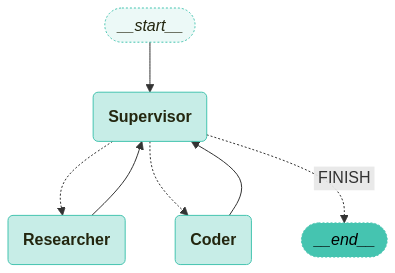

In [170]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

🔄 [Node] 감독자 에이전트 : supervisor_agent()  🔄
--------------------
supervisor_chain 실행: 
next='Researcher'
--------------------

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
Researcher
🔄 [Node] 에이전트 생성 노드 : Researcher  🔄
[Researcher] 에이전트 호출: 

🔄 Node: agent in [Researcher] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (call_CEg59ZZvW3jQJGYZE1a2vpKe)
 Call ID: call_CEg59ZZvW3jQJGYZE1a2vpKe
  Args:
    query: 2024년 대한민국 1인당 GDP 예측

🔄 Node: tools in [Researcher] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "2024년 한국 1인당 Gdp, 3만 6천 달러 돌파 (세계 순위 29위)", "url": "https://sstt551.tistory.com/118", "content": "2024년, 우리나라의 1인당 국내총생산(gdp)이 3만 6천 달러를 넘어섰다는 소식이 들려왔다. 이는 일본과 타이완보다 높은 수치로, 경제적으로 의미 있는 성과로 다가온다. 이는 한국 경제의 지속적인 성장과 

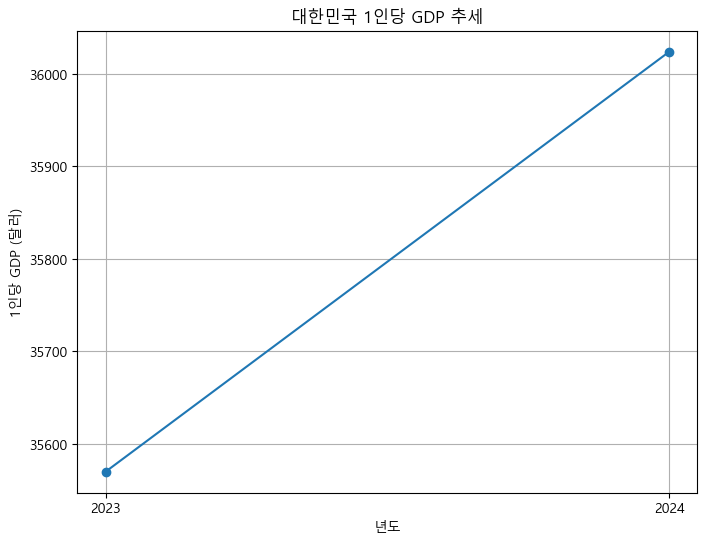


🔄 Node: tools in [Coder] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================= Tool Message =================================
Name: Python_REPL


🔄 Node: agent in [Coder] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================
Tool Calls:
  Python_REPL (call_pxbFAxmX9LENf3Kkkrf2stFY)
 Call ID: call_pxbFAxmX9LENf3Kkkrf2stFY
  Args:
    query: import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# OS 판단
current_os = platform.system()

if current_os == "Windows":
    # Windows 환경 폰트 설정
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
    fontprop = fm.FontProperties(fname=font_path, size=12)
    plt.rc("font", family=fontprop.get_name())
elif current_os == "Darwin":  # macOS
    # Mac 환경 폰트 설정
    plt.rcParams["font.family"] = "AppleGothic"
else:  # Linux 등 기타 OS
    # 기본 한글 폰트 설정 시도
    try:
        plt.rcParams["font.family"] = "Nan

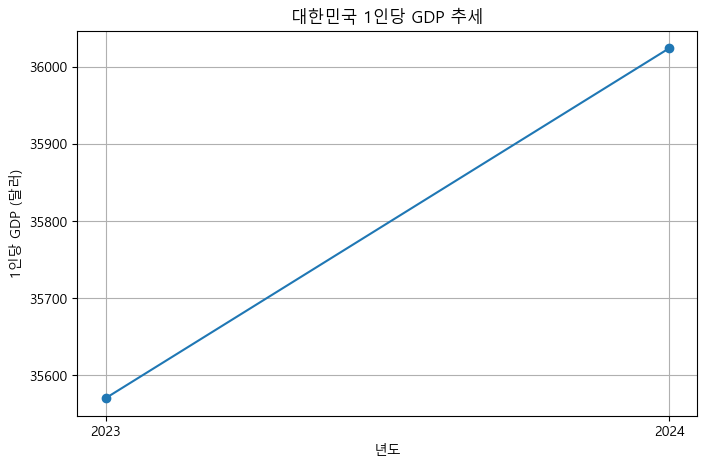


🔄 Node: agent in [Coder] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================
Tool Calls:
  Python_REPL (call_2r1lDeDAfk7zVTno9Nq7JETM)
 Call ID: call_2r1lDeDAfk7zVTno9Nq7JETM
  Args:
    query: import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 설정
years = [2023, 2024]
gdp_per_capita = [35570, 36024]

# 폰트 설정
import platform

# OS 판단
current_os = platform.system()

if current_os == "Windows":
    # Windows 환경 폰트 설정
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
    fontprop = fm.FontProperties(fname=font_path, size=12)
    plt.rc("font", family=fontprop.get_name())
elif current_os == "Darwin":  # macOS
    # Mac 환경 폰트 설정
    plt.rcParams["font.family"] = "AppleGothic"
else:  # Linux 등 기타 OS
    # 기본 한글 폰트 설정 시도
    try:
        plt.rcParams["font.family"] = "NanumGothic"
    except:
        print("한글 폰트를 찾을 수 없습니다. 시스템 기본 폰트를 사용합니다.")

# 마이너스 폰트 깨짐 방지
plt.rcParams["a

In [172]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="2024년의 대한민국의 1인당 GDP를 그래프로 시각화 해주세요."
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)